In [2]:
import pandas as pd

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/bfritscher/pandas_demo/master/statistiques/Exercice_5.csv", index_col=False)
df.head(5)

,obs
0,2.4
1,6.3
2,7.2
3,9.7
4,0.8


In [23]:
df.shape

(495, 1)

In [20]:
[df["obs"].min(), df["obs"].max()]

[0.2, 12.9]

In [25]:
bins = [0,3,6,9,12,14]
discret = pd.cut(df["obs"], bins)
s = discret.value_counts().sort_index()
s

(0, 3]      181
(3, 6]       94
(6, 9]       77
(9, 12]     106
(12, 14]     37
Name: obs, dtype: int64

Text(0,0.5,'Nb de collaborateurs')

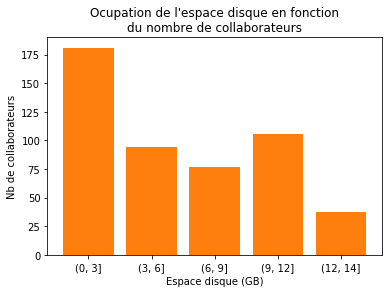

In [27]:
g = s.plot(kind="bar", title="Ocupation de l'espace disque en fonction\ndu nombre de collaborateurs", rot=0, color=['tab:orange',]*12, width=0.8)
g.set_xlabel("Espace disque (GB)")
g.set_ylabel("Nb de collaborateurs")

In [28]:
table = s.to_frame("Effectifs")

In [35]:
table["Fréquences"] = table.apply(lambda n: n / table["Effectifs"].sum() ).round(2)

In [37]:
table["Effectifs cumulés croissants"] = s.cumsum()

In [40]:
table["Fréquences cumulées croissantes"] = table["Effectifs cumulés croissants"].apply(lambda n: n / table["Effectifs"].sum() ).round(2)

In [41]:
table["Effectifs cumulés décroissants"] = table["Effectifs"].loc[::-1].cumsum()

In [42]:
table["Fréquences cumulées décroissantes"] = table["Effectifs cumulés décroissants"].apply(lambda n: n / table["Effectifs"].sum() ).round(2)

In [43]:
table

,Effectifs,Fréquences,Effectifs cumulés croissants,Fréquences cumulées croissantes,Effectifs cumulés décroissants,Fréquences cumulées décroissantes
"(0, 3]",181,0.37,181,0.37,495,1.00
"(3, 6]",94,0.19,275,0.56,314,0.63
"(6, 9]",77,0.16,352,0.71,220,0.44
"(9, 12]",106,0.21,458,0.93,143,0.29
"(12, 14]",37,0.07,495,1.00,37,0.07
